<h2 align="center"> Handwritten Digit Recognition </h2>

## Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification


## Loading Dataset

In [2]:
train = pd.read_csv("train.csv")

In [3]:
test = pd.read_csv("test.csv")

### To view the datasets

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

In [6]:

train.shape

(42000, 785)

In [7]:
test.shape

(28000, 784)

In [8]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [10]:
train.isna().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [11]:
for i in train.columns:
    if train[i].isna().sum() > 0:
        print(i)

In [12]:
test.isna().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [13]:
for i in test.columns:
    if test[i].isna().sum() > 0:
        print(i)

### Proportion of each digit in train dataset

In [14]:
train['label'].value_counts(normalize=True)

1    0.111524
7    0.104786
3    0.103595
9    0.099714
2    0.099452
6    0.098500
0    0.098381
4    0.096952
8    0.096738
5    0.090357
Name: label, dtype: float64

### Plotting a histogram of the digits in train dataset

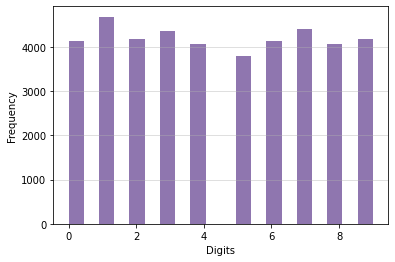

In [15]:
plt.hist(train['label'], bins=20, alpha=0.7, color='#603c8e')
plt.xlabel('Digits')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

## Data Pre-Processing

In [16]:
X_train, X_test, y_train, y_test = train_test_split(train[train.columns[1:785]], train[train.columns[0]]
                                                    , test_size=0.2)

In [17]:
# Predictor variables of training set
X_train.shape

(33600, 784)

In [18]:
# Dependent/outcome variable of training set
y_train.shape

(33600,)

In [19]:
X_test.shape

(8400, 784)

In [20]:
y_test.shape

(8400,)

## Training a Multinomial Naive-Bayes Classifier Model


In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:

mnb = MultinomialNB()

In [23]:
mnb.fit(X_train, y_train)

MultinomialNB()

In [24]:
mnb_pred = mnb.predict(X_test)

In [25]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, mnb_pred)*100, 2)}%")

Accuracy: 82.49%


In [26]:
param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 10.0],
              'fit_prior': [True,False]}

In [28]:

mnb_GS = GridSearchCV(mnb, param_grid, cv=5, verbose=2, n_jobs=1)

In [29]:
mnb_GS.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ........................alpha=1e-05, fit_prior=True; total time=   2.1s
[CV] END ........................alpha=1e-05, fit_prior=True; total time=   2.4s
[CV] END ........................alpha=1e-05, fit_prior=True; total time=   2.2s
[CV] END ........................alpha=1e-05, fit_prior=True; total time=   2.3s
[CV] END ........................alpha=1e-05, fit_prior=True; total time=   2.6s
[CV] END .......................alpha=1e-05, fit_prior=False; total time=   2.8s
[CV] END .......................alpha=1e-05, fit_prior=False; total time=   2.4s
[CV] END .......................alpha=1e-05, fit_prior=False; total time=   2.2s
[CV] END .......................alpha=1e-05, fit_prior=False; total time=   2.3s
[CV] END .......................alpha=1e-05, fit_prior=False; total time=   2.3s
[CV] END .......................alpha=0.0001, fit_prior=True; total time=   2.2s
[CV] END .......................alpha=0.0001, fi

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0,
                                   10.0],
                         'fit_prior': [True, False]},
             verbose=2)

In [30]:
mnb_GS_pred = mnb_GS.predict(X_test)

In [31]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, mnb_GS_pred)*100, 2)}%")

Accuracy: 82.49%


In [32]:
mnb_GS.best_params_

{'alpha': 1e-05, 'fit_prior': True}

### Classification Report:

In [33]:
mnb_report = classification_report(y_true = y_test, y_pred = mnb_GS_pred)

In [34]:
print(mnb_report)

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       844
           1       0.89      0.93      0.91       947
           2       0.89      0.82      0.86       829
           3       0.81      0.80      0.80       865
           4       0.82      0.73      0.77       845
           5       0.85      0.67      0.75       759
           6       0.88      0.93      0.90       850
           7       0.94      0.81      0.87       857
           8       0.64      0.80      0.71       804
           9       0.67      0.84      0.75       800

    accuracy                           0.82      8400
   macro avg       0.83      0.82      0.82      8400
weighted avg       0.84      0.82      0.83      8400



In [37]:
from sklearn.metrics import f1_score
f1_score(y_test, mnb_pred, average='weighted')

0.8262754355021087

## Training a Random Forest Classifier Model

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc = RandomForestClassifier()

In [41]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
rfc_pred = rfc.predict(X_test)

In [ ]:
rfc_probs = rfc.predict_proba(X_test)[:, 1]

### Classification Report:

In [43]:
rfc_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=rfc.predict(X_test))
print(rfc_report)

              precision    recall  f1-score   support

           0   0.976636  0.990521  0.983529       844
           1   0.980126  0.989440  0.984761       947
           2   0.960928  0.949337  0.955097       829
           3   0.953380  0.945665  0.949507       865
           4   0.952047  0.963314  0.957647       845
           5   0.963952  0.951252  0.957560       759
           6   0.980047  0.982353  0.981199       850
           7   0.955763  0.957993  0.956876       857
           8   0.965736  0.946517  0.956030       804
           9   0.933168  0.942500  0.937811       800

    accuracy                       0.962500      8400
   macro avg   0.962178  0.961889  0.962002      8400
weighted avg   0.962497  0.962500  0.962467      8400



In [45]:
from sklearn.metrics import f1_score
f1_score(y_test, rfc_pred, average='weighted')

0.9624672194942853

In [46]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
result = rfc.predict(test)

In [48]:

print(result)
print(result.shape)

[2 0 9 ... 3 9 2]
(28000,)


In [49]:
x = range(1, 28001)
print(x)

range(1, 28001)


In [50]:
xd = pd.DataFrame(x)
xd.columns = ['ImageId'] 
print(xd.head())

   ImageId
0        1
1        2
2        3
3        4
4        5


In [53]:
xd.reset_index(drop = True)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


## Training a ANN Classifier Model

In [39]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential

In [40]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [41]:
train.shape, test.shape

((42000, 785), (28000, 784))

In [42]:

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
test.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
x_train = train.iloc[:,1:]

In [45]:
x_train.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
y_train = train.iloc[:,0]

In [47]:
y_train.head(5)

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [48]:
x_train = x_train / 255.0
test = test / 255.0

In [49]:
#reshape

x_train= x_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

In [50]:

x_train.shape

(42000, 28, 28, 1)

In [51]:
#build simple ANN

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28,1)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [52]:
#compile model

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])

In [53]:
#train model
r = model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1313/1313 [==============================] - 7s 5ms/step - loss: 0.3389 - accuracy: 0.9011
Epoch 2/15
1313/1313 [==============================] - 7s 6ms/step - loss: 0.1603 - accuracy: 0.9526
Epoch 3/15
1313/1313 [==============================] - 7s 6ms/step - loss: 0.1199 - accuracy: 0.9648
Epoch 4/15
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0964 - accuracy: 0.9703
Epoch 5/15
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0806 - accuracy: 0.9743
Epoch 6/15
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0685 - accuracy: 0.9785
Epoch 7/15
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0615 - accuracy: 0.9805
Epoch 8/15
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0537 - accuracy: 0.9823
Epoch 9/15
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0467 - accuracy: 0.9842
Epoch 10/15
1313/1313 [==============================] - 6s 4ms/step - loss: 0.043

In [19]:
test.shape

(28000, 28, 28, 1)

In [26]:
x_train.shape

(42000, 28, 28, 1)

In [27]:
results=model.predict(test)

In [28]:
results = np.argmax(results, axis =1)